## Normal distribution

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [2]:
# reading the Life expectancy data set .
df = pd.read_csv("./datasets/Life Expectancy Data.csv")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


**Removing extra spaces from the columns** 

In [3]:
df.columns = [col.strip() for col in df.columns]

In [4]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## Schooling distribution

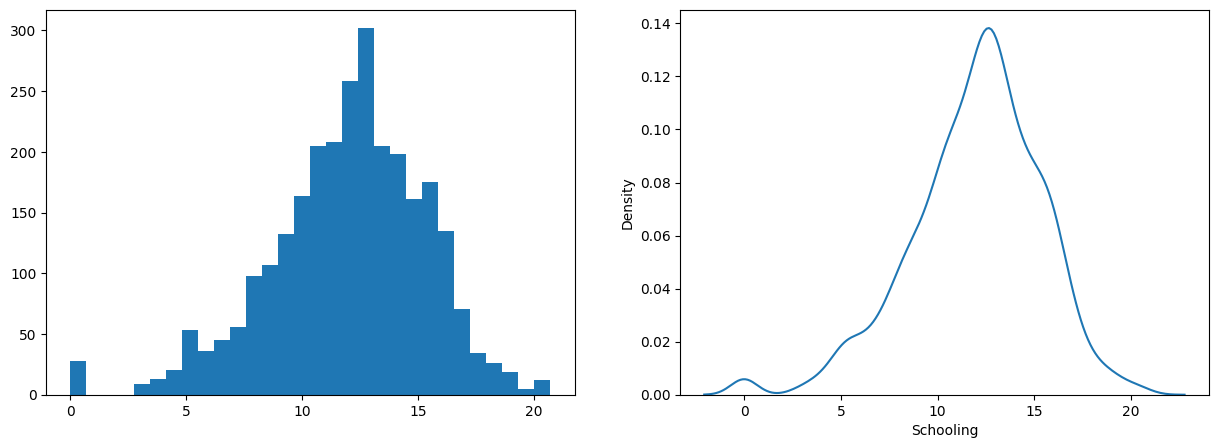

In [5]:
fig, axes = plt.subplots(figsize = (15, 5), ncols=2)
axes1 , axes2 = axes

axes1.hist(df.Schooling, bins=30)
sns.kdeplot(df.Schooling, ax=axes2)
plt.show()

Note: from above plot it is is clear that Schooling distribution is normal throughout the world. but in this plot we can see some outliers so first we will remove those outliers then we will again plot the chart.

<Axes: >

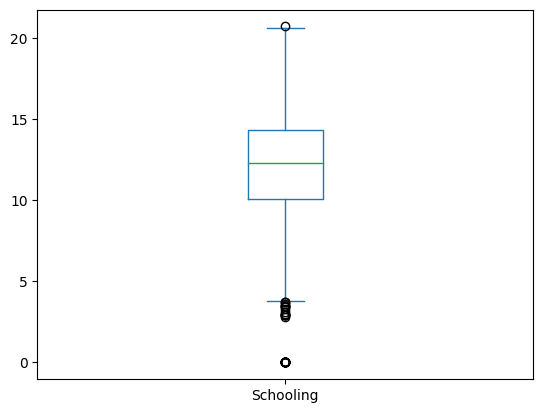

In [6]:
df.Schooling.plot.box()

As we can see from box plot we have some outliers at downside of the range and there is one outlier as well at the top of the range. so first we need to remove the outliers.

### 1. Removing the nan values.

In [7]:
ISchooling = df.Schooling.dropna()

In [8]:
def box_parm(Series, offset=1.5):
    Q1 = np.percentile(Series, 25)
    Q2 = np.percentile(Series, 50)
    Q3 = np.percentile(Series, 75)
    
    IQR = Q3-Q1
    left_flier = Q1 - offset*IQR
    right_flier = Q3 + offset*IQR
    
    return {"Q1": Q1, "Q2":Q2, "Q3": Q3, 
           "IQR": IQR, "minValue":left_flier, "maxValue":right_flier}

In [9]:
box_parm(ISchooling)

{'Q1': 10.1,
 'Q2': 12.3,
 'Q3': 14.3,
 'IQR': 4.200000000000001,
 'minValue': 3.799999999999998,
 'maxValue': 20.6}

In [10]:
# a method to remove the outliers from the series
def remove_outliers(Series, offset=1.5):

    # first we need to get the box values.
    boxValues = box_parm(Series, offset)

    # Now we have the boxValues so we need to get the outliers value by using them.
    min_filter = ISchooling > boxValues["minValue"] # all values greater than minValue
    max_filter = ISchooling < boxValues["maxValue"] # all values less than maxValue
    
    x_series = Series[min_filter & max_filter]
    return x_series

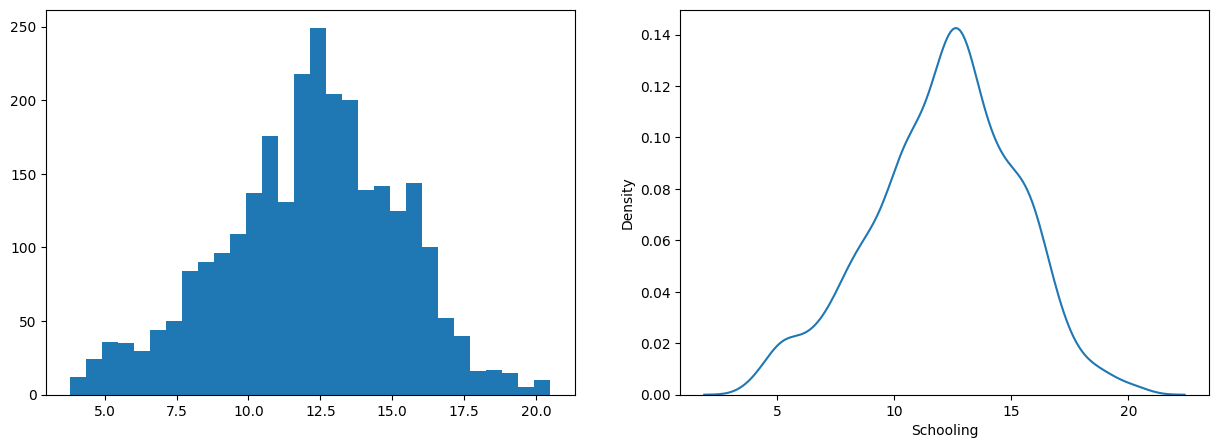

In [11]:
ix_Schooling =  remove_outliers(ISchooling)
fig, axes = plt.subplots(figsize = (15, 5), ncols=2)
axes1 , axes2 = axes

axes1.hist(ix_Schooling, bins=30)
sns.kdeplot(ix_Schooling, ax=axes2)
plt.show()

**Note:** Now we have the more refined version of the distribution of Schooling.

Now we will create a random normal distribution

In [12]:
boxValues = box_parm(ix_Schooling)

In [20]:
boxValues

{'Q1': 10.2,
 'Q2': 12.4,
 'Q3': 14.3,
 'IQR': 4.100000000000001,
 'minValue': 4.049999999999997,
 'maxValue': 20.450000000000003}

## Schooling Parametric Density Estimation
Now we will perform the parametric Density estimation on the Schooling dataset, and then compare with our Original distribution Test that our Schooling distribution is actually normally distributed or not.

In [23]:
school_mean = ix_Schooling.mean()
school_std = ix_Schooling.std()
print(f"school new mean: {school_mean:0.2f}")
print(f"school new std: {school_std:0.2f}")

school new mean: 12.16
school new std: 3.08


(array([  1.,   0.,   3.,   8.,  17.,  26.,  39.,  86., 125., 161., 215.,
        254., 273., 283., 228., 222., 186., 133.,  95.,  73.,  34.,  24.,
          5.,   5.,   4.]),
 array([ 0.97608613,  1.82333248,  2.67057883,  3.51782519,  4.36507154,
         5.2123179 ,  6.05956425,  6.90681061,  7.75405696,  8.60130331,
         9.44854967, 10.29579602, 11.14304238, 11.99028873, 12.83753508,
        13.68478144, 14.53202779, 15.37927415, 16.2265205 , 17.07376685,
        17.92101321, 18.76825956, 19.61550592, 20.46275227, 21.30999862,
        22.15724498]),
 <BarContainer object of 25 artists>)

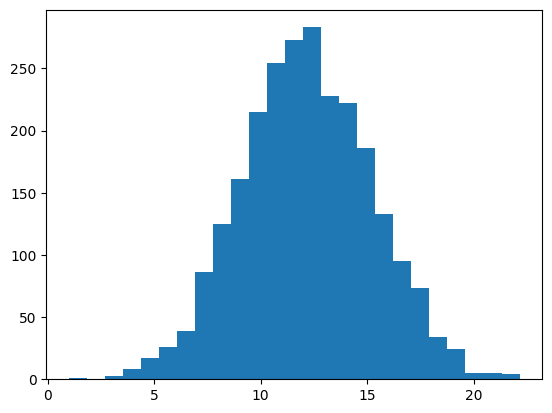

In [25]:
# creating a random normal distribution with mean and standard deviation.
school_sample = np.random.normal(loc=school_mean, scale=school_std, size = 2500)
# Now we will plot the histogram on that distribution
plt.hist(school_sample, bins=25)


In [26]:
school_sample_mean =  np.mean(school_sample)
school_sample_std = np.std(school_sample)
print("school sample mean: %.3f"% (school_sample_mean))
print("school sample std: %.3f" % (school_sample_std))

school sample mean: 12.164
school sample std: 3.052


Now we will calculate the probability distribution function by using those sample mean and std values. 

In [16]:
# defining the distribution
dist = norm(school_sample_mean, school_sample_std)
dist

Now we will will calculate the distribution gor a given range of the Original value.

In [31]:
probabilities = [dist.pdf(value) for value in range(0, 26)]
probabilities

[0.00020486512304479805,
 0.0005656889258365196,
 0.0014300141915545728,
 0.0033094516499441325,
 0.007011723086915702,
 0.013600237560854855,
 0.024150229109613557,
 0.03925988638967188,
 0.05842918712182426,
 0.07960927572339904,
 0.09930029157909108,
 0.11339408403127545,
 0.11854501427727304,
 0.1134564555754369,
 0.09940956034600022,
 0.0797407134034367,
 0.05855784732673482,
 0.03936797822787044,
 0.02423004067569715,
 0.013652688991708834,
 0.007042636505766073,
 0.0033258707876546046,
 0.001437899372325184,
 0.0005691210357758769,
 0.0002062214351473489,
 6.840943351050054e-05]

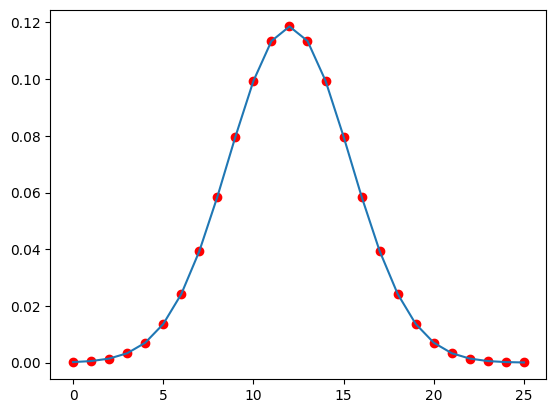

In [33]:

plt.plot(np.arange(0,26), probabilities)
plt.scatter(np.arange(0,26), probabilities, color='red')
plt.show()

**Plotting the probability distribution with the given sample histogram**

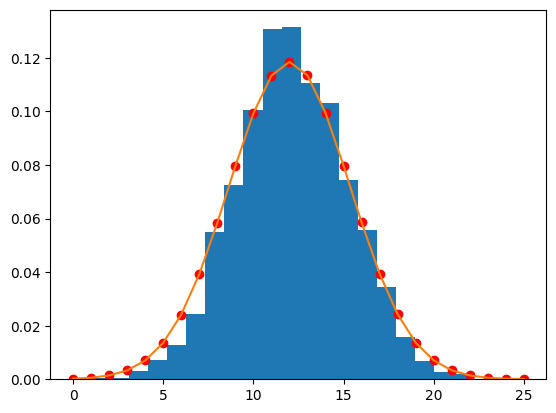

In [35]:
plt.hist(school_sample, bins=20, density=True)
plt.plot(np.arange(0,26), probabilities)
plt.scatter(np.arange(0,26), probabilities, color='red')
plt.show()

**Plotting Normal distribution with original Schooling data**

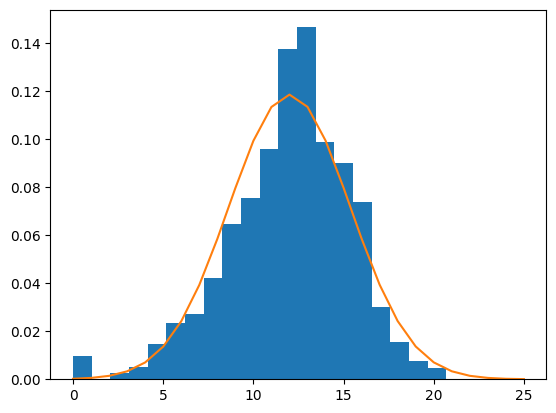

In [36]:
plt.hist(ISchooling, bins=20, density=True)
plt.plot(np.arange(0,26), probabilities)
plt.show()

**Note:** Our Dataset is slightly skewed which can be ignored for if skewness is not too much, to measure the skewness we can  use the 

### Skewness and Kurtosis

Skewness and kurtosis are two measures of the shape of a probability distribution. They help to describe how the data values are spread around the mean, and how likely they are to have extreme values.

Skewness measures the degree of asymmetry of a distribution. A distribution is symmetric if it looks the same on both sides of the mean. A distribution is skewed if it is shifted to one side or the other. For example, a distribution with a long tail on the right is positively skewed, while a distribution with a long tail on the left is negatively skewed.

Kurtosis measures the degree of heaviness of the tails of a distribution. A distribution has heavy tails if it has more extreme values than a normal distribution. A distribution has light tails if it has fewer extreme values than a normal distribution. For example, a distribution with high kurtosis has more values in the tails, while a distribution with low kurtosis has more values in the center.

To interpret skewness and kurtosis, we can compare them with the values of a normal distribution, which has zero skewness and zero excess kurtosis. Excess kurtosis is the difference between the kurtosis of a distribution and the kurtosis of a normal distribution. A rule of thumb is that:

- If the skewness is between -0.5 and 0.5, the distribution is approximately symmetric.
- If the skewness is less than -0.5, the distribution is moderately negatively skewed.
- If the skewness is less than -1, the distribution is highly negatively skewed.
- If the skewness is greater than 0.5, the distribution is moderately positively skewed.
- If the skewness is greater than 1, the distribution is highly positively skewed.

- If the excess kurtosis is close to 0, the distribution has similar tails to a normal distribution.
- If the excess kurtosis is less than -2, the distribution has lighter tails than a normal distribution.
- If the excess kurtosis is greater than 2, the distribution has heavier tails than a normal distribution.

Skewness and kurtosis can be calculated using formulas or using software tools. They can also be estimated by looking at histograms or box plots of the data. Skewness and kurtosis are useful for checking if the data follow a normal distribution, which is often assumed for statistical tests and models.


In [37]:
ix_Schooling.skew()

-0.23859376474153213

In [38]:
ix_Schooling.kurtosis()

-0.14947971683838412

## Standard normal Distribution

In [14]:
snd =  np.random.normal(size=10000)

<Axes: ylabel='Density'>

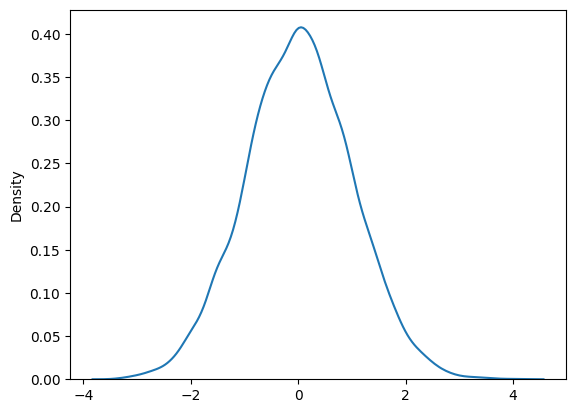

In [15]:
sns.kdeplot(snd )

In [11]:
def zScore(x,mean,std):
    return (x-mean)/std

In [12]:
# x = 82, mean= 72, std = 10
z1 = zScore(82, 72, 10)

# x  = 74, mean = 64, std = 6
z2 = zScore(74, 64, 6)

In [13]:
print("Jack's z-score: ", z1)
print("Tina's z-score: ", z2)

Jack's z-score:  1.0
Tina's z-score:  1.6666666666666667


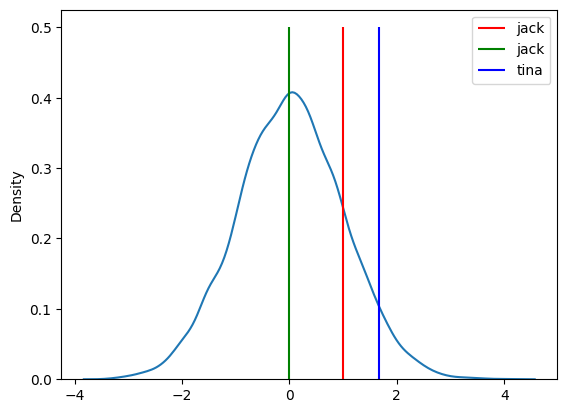

In [23]:
fig, axes = plt.subplots()

sns.kdeplot(snd, ax = axes)
axes.vlines(z1, ymin=0, ymax=.50, color='red', label='jack')
axes.vlines(0, ymin=0, ymax=.50, color='green', label='jack')
axes.vlines(z2, ymin=0, ymax=.50, color='blue', label='tina')
axes.legend()
plt.show()